In [107]:
import time
import cv2 as cv
import numpy as np
import imutils
from matplotlib import pyplot as plt

## Mostrando uma imagem
![title](figs/imgTeste.jpg)

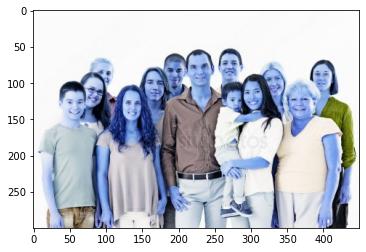

In [3]:
img = cv.imread('figs/imgTeste.jpg')
plt.imshow(img)
plt.show()

* As cores da nossa imagem estão erradas!

* O OpenCV representa imagens RGB como matrizes NumPy multidimensionais mas em ordem inversa

* imagens são representadas em ordem BGR em vez de RGB!

* Para mostrar corretamente é necessário converter de BGR para RGB:

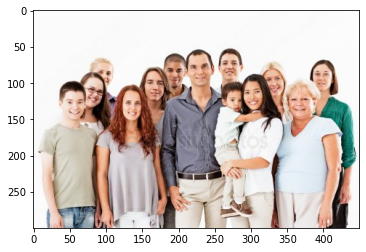

In [4]:
img = cv.imread('figs/imgTeste.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## Obtendo tamanho da imagem (usando recursos do numpy)
* Nesse exemplo, Altura x Largura x Quantidade de Canais

In [5]:
img.shape

(300, 450, 3)

## Obtendo valores de canais de um único pixel

In [6]:
(B, G, R) = img[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=37, G=24, B=18


## Alterando valor de um pixel

In [9]:
px = img[100,100]
print( px )

blue = img[100,100,0]
print( blue )

[188 214 251]
188


## Alterando valor de um bloco de pixels

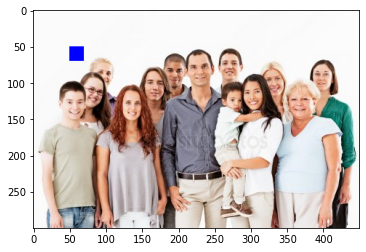

In [10]:
img[50:70,50:70] = [255,0,0]
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## Abrindo uma imagem em tons de cinza

(480, 1120, 3)


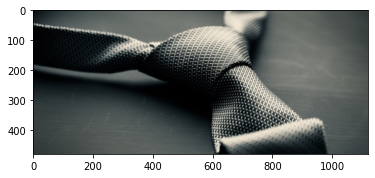

In [11]:
img = cv.imread('figs/cinza.jpg')
print(img.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [12]:
img = cv.imread("figs/cinza.jpg", -1) 
cv.imwrite("figs/cinzaout.jpg", img) 

True

(480, 1120)


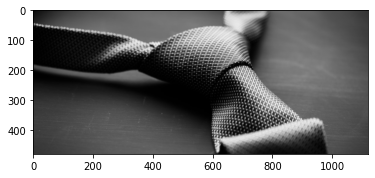

In [14]:
img = cv.imread('figs/cinzaout.jpg', 0)
print(img.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## Crop e Slicing de imagem
* O primeiro parâmetro corta horizontalmente e segundo verticalmente

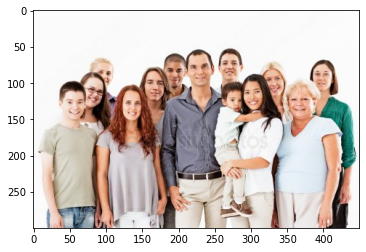

In [29]:
img = cv.imread('figs/imgTeste.jpg', -1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

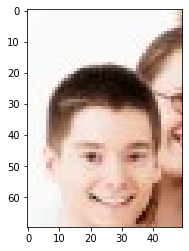

In [30]:
roi = img[80:150, 30:80]
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))
plt.show()

## Incluindo elemento na imagem

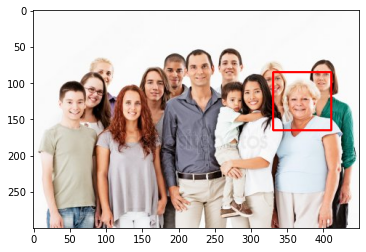

In [54]:
output = img.copy()
cv.rectangle(output, (330, 85), (410, 165), (0, 0, 255), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.show()

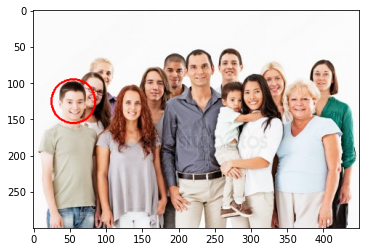

In [38]:
output = img.copy()
cv.circle(output, (55, 125), 30, (0, 0, 255), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.show()

## Incluindo texto na imagem

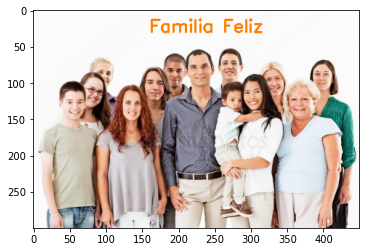

In [51]:
output = img.copy()
cv.putText(output, "Familia Feliz", (160, 30), 
           cv.FONT_HERSHEY_SIMPLEX, 0.8, (0,125, 255), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.show()

## Representação piramide
* Diminuindo a quantidade de pixels por região da imagem

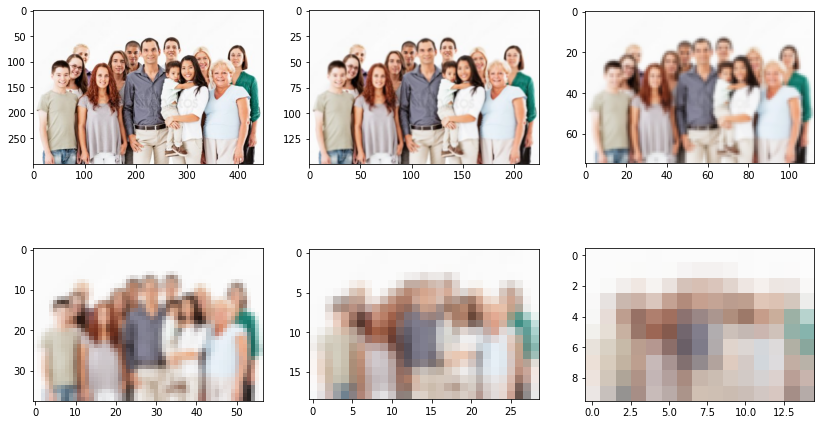

In [61]:
layer = img.copy() 
fig, axs = plt.subplots(2, 3, figsize=(14,8))
for i in range(6): 
    axs.flatten()[i].imshow(cv.cvtColor(layer, cv.COLOR_BGR2RGB))
    layer = cv.pyrDown(layer) 

## Alterando tamanho da imagem
* Ignorando aspect ratio

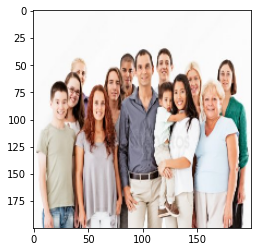

In [62]:
resized = cv.resize(img, (200, 200))
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))
plt.show()

* considerando aspect ratio

Original Dimensions : (300, 450, 3)
Resized Dimensions:  (180, 270, 3)


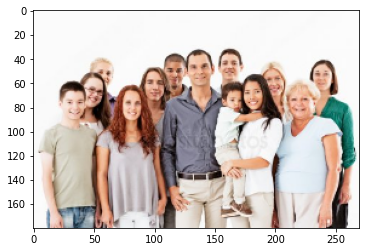

In [63]:
print('Original Dimensions :', img.shape)
 
scale_percent = 60 # porcentagem da imagem original
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv.resize(img, dim)
 
print('Resized Dimensions: ', resized.shape)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))
plt.show()

## Alterando posição da imagem
* Aplicação de uma matriz transformacional
* Função warpAffine

[[ -1.   0. 500.]
 [  0.  -1. 330.]]


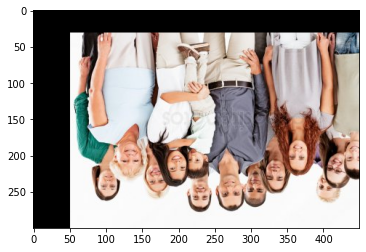

In [101]:
rows, cols, channels = img.shape

M = np.float32([[-1,0,cols+50],[0,-1,rows+30]])
print(M)

dst = cv.warpAffine(img, M, (cols, rows))
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

## Rotacionando imagem
* Rotação simples cortando a  imagem

[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[  0.8660254    0.5        -44.67270315]
 [ -0.5          0.8660254  132.27920213]]
[[  0.5          0.8660254  -17.22079787]
 [ -0.8660254    0.5        269.17270315]]
[[ 6.123234e-17  1.000000e+00  7.500000e+01]
 [-1.000000e+00  6.123234e-17  3.740000e+02]]
[[ -0.5          0.8660254  207.27920213]
 [ -0.8660254   -0.5        418.67270315]]
[[ -0.8660254    0.5        344.17270315]
 [ -0.5         -0.8660254  391.22079787]]


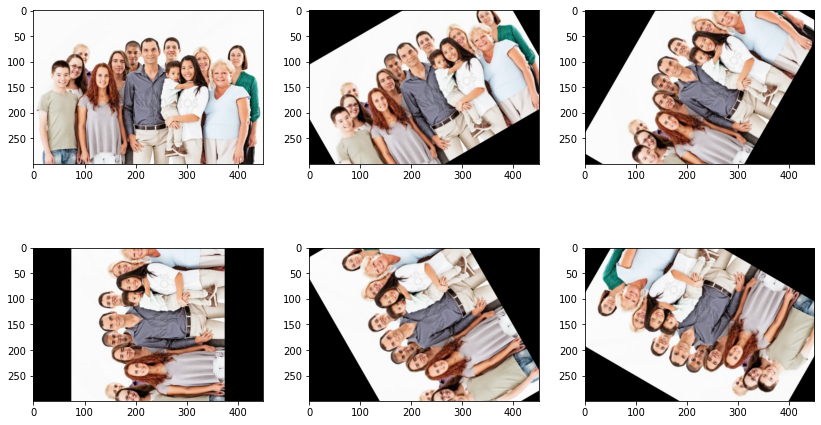

Elapsed time: 1.4063904285430908


In [108]:
start = time.time()
rows, cols, channels = img.shape

fig, axs = plt.subplots(2, 3, figsize=(14,8))
for i in range(6): 
    M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), i * 30, 1)
    print(M)
    dst = cv.warpAffine(img, M, (cols,rows))
    axs.flatten()[i].imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()
print('Elapsed time:', time.time()-start)

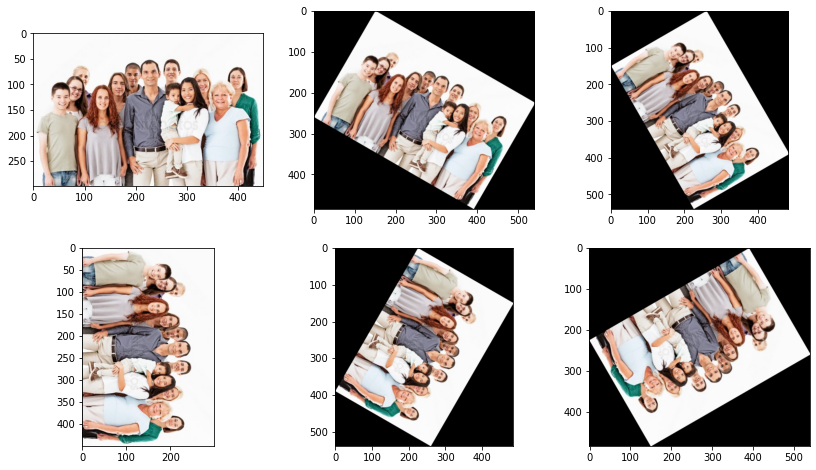

Elapsed time: 1.359292984008789


In [109]:
start = time.time()
fig, axs = plt.subplots(2, 3, figsize=(14,8))
for i in range(6): 
    rotated = imutils.rotate_bound(img, i * 30)
    axs.flatten()[i].imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))
plt.show()
print('Elapsed time:', time.time()-start)

## Tetris

Image shape: (320, 840, 3)


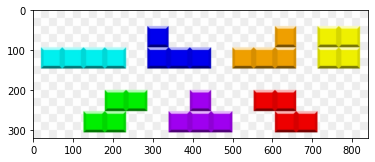

In [112]:
img = cv.imread('figs/tetris.png', -1)
print('Image shape:', img.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## Modificando para escala de cinza

Image shape: (320, 840)


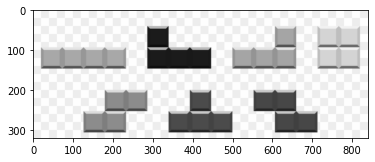

In [156]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print('Image shape:', gray.shape)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
plt.show()

## Algoritmo para detecção de borda

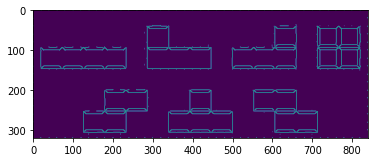

In [157]:
edged = cv.Canny(gray, 70, 70)
plt.imshow(edged)
plt.show()

## Thresholding
* Ajuda a remover regiões ou contornos mais claros ou escuros
* Nesse exemplo criou um limiar para o valor de pixel 225
    * valores maiores que 225 são alterados para 255
    * valores menores que 225 são alterados para 0

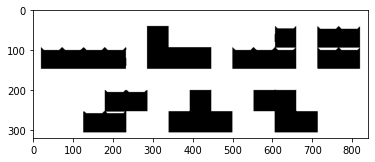

thresh: 215.0


In [170]:
(thresh, im_bw) = cv.threshold(gray, 215, 255, cv.THRESH_BINARY)
plt.imshow(cv.cvtColor(im_bw, cv.COLOR_BGR2RGB))
plt.show()

print('thresh:', thresh)

Objetos encontrados: 12


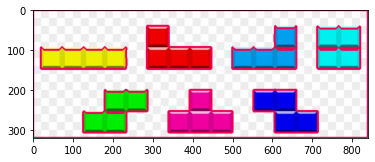

In [171]:
# find contours (i.e., outlines) of the foreground objects in the thresholded image
#print(im_bw.dtype)
#cnts = cv.findContours(im_bw.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cv.findContours(im_bw.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print('Objetos encontrados:', len(cnts))
output = img.copy()

for c in cnts:
    cv.drawContours(output, [c], -1, (240, 0, 80), 3)
    plt.imshow(output)

## Erosão

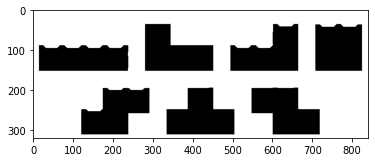

In [182]:
mask = im_bw.copy()
mask = cv.erode(mask, None, iterations=5)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()

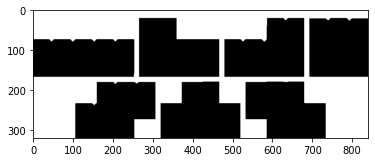

In [178]:
mask = im_bw.copy()
mask = cv.erode(mask, None, iterations=20)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()

## Dilatação

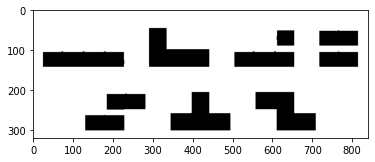

In [183]:
mask = im_bw.copy()
mask = cv.dilate(mask, None, iterations=5)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()

## Aplicações sucessivas de Erode + Dilate

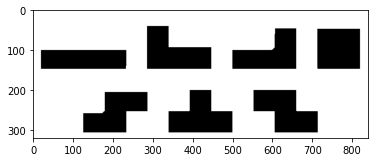

In [187]:
mask = im_bw.copy()
mask = cv.erode(mask, None, iterations=10)
mask = cv.dilate(mask, None, iterations=20)
mask = cv.erode(mask, None, iterations=10)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()

## bitwise

In [190]:
mask = im_bw.copy()
output = cv.bitwise_and(img, img, mask=mask)
plt.imshow(output)
plt.show()

error: OpenCV(4.2.0) /io/opencv/modules/core/src/arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
